In [ ]:

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# import plotly.plotly as py
from plotly import tools
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=False)
import warnings
warnings.filterwarnings("ignore")

Output hidden; open in https://colab.research.google.com to view.

###Reading File


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/WiDS_Dataset/IPL_Matches_2008_2022.csv")
matches = pd.read_csv("/content/drive/MyDrive/WiDS_Dataset/matches.csv")
delivery = pd.read_csv("/content/drive/MyDrive/WiDS_Dataset/IPL_Ball_by_Ball_2008_2022.csv")

In [ ]:
delivery.head(2)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals


### **Some Cleaning And Transformation**

In [ ]:
matches.drop(['umpire3'],axis=1,inplace=True)  #since all the values are NaN
delivery.fillna(0,inplace=True)     #filling all the NaN values with 0

In [ ]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [ ]:
df.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [ ]:
df.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [ ]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,N,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,N,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,N,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,N,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri


### **Exploratory Data Analysis(EDA)**

###Maximum number of wins by any team in any particular season

In [ ]:
ipl_matches_df = pd.read_csv('/content/drive/MyDrive/WiDS_Dataset/IPL_Matches_2008_2022.csv')
teams_per_season = ipl_matches_df.groupby('Season')['WinningTeam'].value_counts()

teams_per_season

Season   WinningTeam          
2007/08  Rajasthan Royals         13
         Kings XI Punjab          10
         Chennai Super Kings       9
         Delhi Daredevils          7
         Mumbai Indians            7
                                  ..
2022     Punjab Kings              7
         Kolkata Knight Riders     6
         Sunrisers Hyderabad       6
         Chennai Super Kings       4
         Mumbai Indians            4
Name: WinningTeam, Length: 126, dtype: int64

###Venues hosting no. of matches

In [ ]:
venue_ser = ipl_matches_df['Venue'].value_counts()
venue_df = pd.DataFrame(columns=['venue', 'matches'])
for items in venue_ser.iteritems():
    temp_df = pd.DataFrame({
        'venue':[items[0]],
        'matches':[items[1]]
    })
    venue_df = venue_df.append(temp_df, ignore_index=True)

In [ ]:
venue_df

,venue,matches
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,65
3,Feroz Shah Kotla,60
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,Sawai Mansingh Stadium,47
7,Dubai International Cricket Stadium,46
8,"Punjab Cricket Association Stadium, Mohali",35
9,"Wankhede Stadium, Mumbai",31


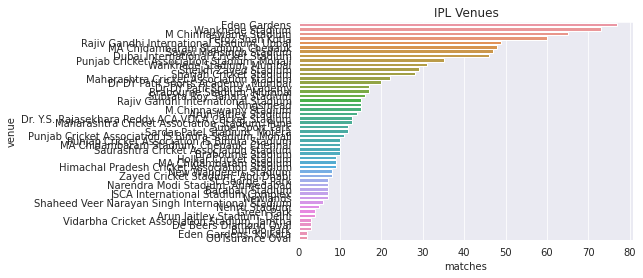

In [ ]:
plt.title("IPL Venues")
sns.barplot(x='matches', y='venue', data=venue_df);

###Players to get the most no of 'Man of the Match' award

In [ ]:
mvp_ser = ipl_matches_df['Player_of_Match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0
for items in mvp_ser.iteritems():
    if count>9:
        break
    else:
        temp_df2 = pd.DataFrame({
            'player':[items[0]],
            'wins':[items[1]]
        })
        mvp_ten_df = mvp_ten_df.append(temp_df2, ignore_index=True)
        count += 1    

In [ ]:
mvp_ten_df

,player,wins
0,AB de Villiers,25
1,CH Gayle,22
2,DA Warner,18
3,RG Sharma,18
4,MS Dhoni,17
5,YK Pathan,16
6,SR Watson,16
7,KA Pollard,14
8,SK Raina,14
9,V Kohli,14


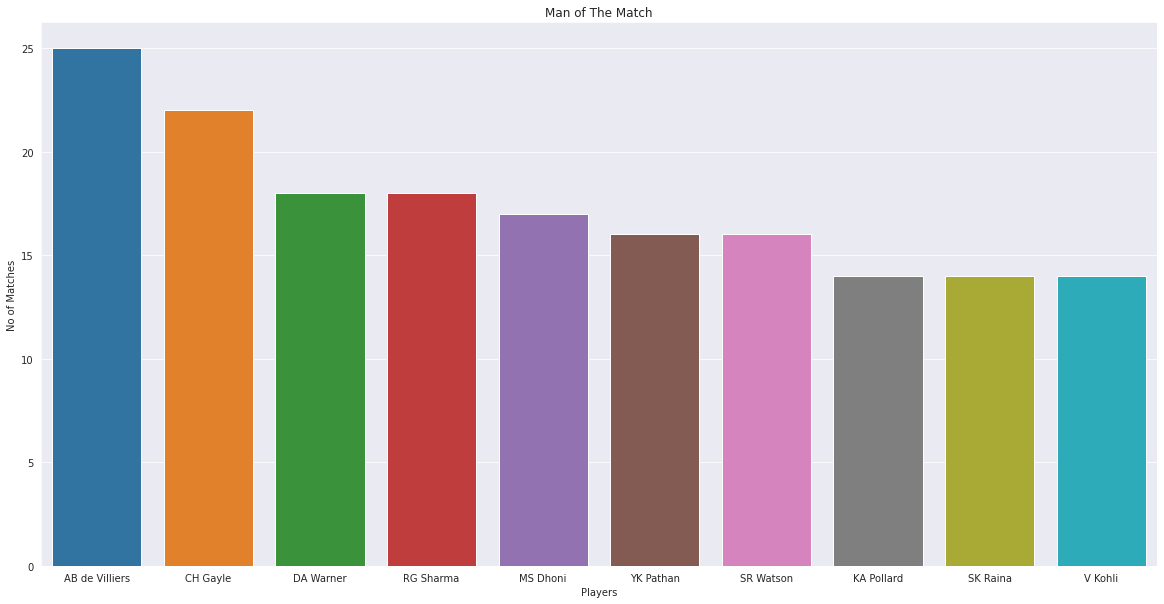

In [ ]:

plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
sns.barplot(x=mvp_ten_df['player'],y=mvp_ten_df['wins'],dodge=False)
plt.xlabel('Players')
plt.ylabel('No of Matches')
plt.title('Man of The Match')
plt.show()

In [ ]:
mvp_ser

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
                  ..
CR Brathwaite      1
Mohsin Khan        1
A Zampa            1
BCJ Cutting        1
MF Maharoof        1
Name: Player_of_Match, Length: 262, dtype: int64

###**Most Successful teams**

In [ ]:
team_wins_ser = ipl_matches_df['WinningTeam'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])
for items in team_wins_ser.iteritems():
    temp_df1 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    team_wins_df = team_wins_df.append(temp_df1, ignore_index=True)

In [ ]:
team_wins_df

,team,wins
0,Mumbai Indians,131
1,Chennai Super Kings,121
2,Kolkata Knight Riders,114
3,Royal Challengers Bangalore,109
4,Rajasthan Royals,96
5,Kings XI Punjab,88
6,Sunrisers Hyderabad,75
7,Delhi Daredevils,67
8,Delhi Capitals,36
9,Deccan Chargers,29


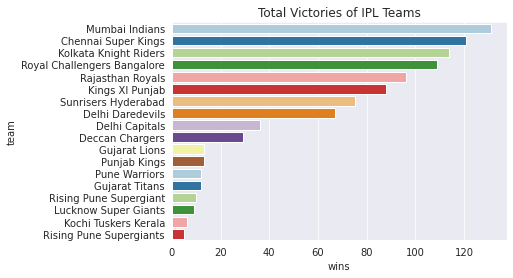

In [ ]:
plt.title("Total Victories of IPL Teams")
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');

###**Teams winning most no of tosses**

In [ ]:
toss_ser = ipl_matches_df['TossWinner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

for items in toss_ser.iteritems():
    temp_df3 = pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss_df = toss_df.append(temp_df3, ignore_index=True) 

In [ ]:
toss_df

,team,wins
0,Mumbai Indians,123
1,Kolkata Knight Riders,114
2,Chennai Super Kings,109
3,Royal Challengers Bangalore,105
4,Rajasthan Royals,99
5,Kings XI Punjab,85
6,Delhi Daredevils,80
7,Sunrisers Hyderabad,74
8,Deccan Chargers,43
9,Delhi Capitals,36


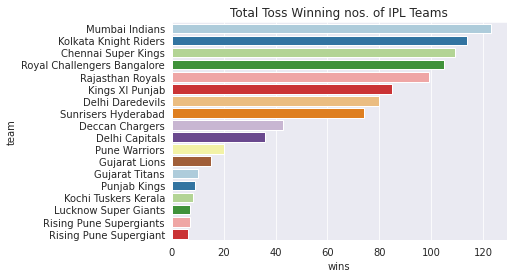

In [ ]:
plt.title("Total Toss Winning nos. of IPL Teams")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

###**Top 10 greatest victories**

**Top 10 greatest victories by runs**

In [ ]:
matches

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


In [162]:

temp=matches.sort_values('win_by_runs',ascending=False)
temp['team1 v/s team2']=0
temp.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1 v/s team2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,0
619,620,2016,Bangalore,2016-05-14,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,144,0,AB de Villiers,M Chinnaswamy Stadium,AY Dandekar,VK Sharma,0
59,60,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,0
556,557,2015,Bangalore,2015-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,138,0,CH Gayle,M Chinnaswamy Stadium,RK Illingworth,VA Kulkarni,0
410,411,2013,Bangalore,2013-04-23,Royal Challengers Bangalore,Pune Warriors,Pune Warriors,field,normal,0,Royal Challengers Bangalore,130,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,C Shamshuddin,0
706,11147,2019,Hyderabad,31/03/19,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,118,0,J Bairstow,Rajiv Gandhi Intl. Cricket Stadium,S Ravi,KN Anantapadmanabhan,0
295,296,2011,Dharamsala,2011-05-17,Kings XI Punjab,Royal Challengers Bangalore,Kings XI Punjab,bat,normal,0,Kings XI Punjab,111,0,AC Gilchrist,Himachal Pradesh Cricket Association Stadium,Asad Rauf,AM Saheba,0
114,115,2008,Mumbai,2008-05-30,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,field,normal,0,Rajasthan Royals,105,0,SR Watson,Wankhede Stadium,BF Bowden,RE Koertzen,0
676,7934,2018,Kolkata,09/05/18,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Mumbai Indians,102,0,Ishan Kishan,Eden Gardens,Anil Chaudhary,K Ananthapadmanabhan,0
182,183,2010,Delhi,2010-03-17,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,98,0,SR Tendulkar,Feroz Shah Kotla,BR Doctrove,SK Tarapore,0


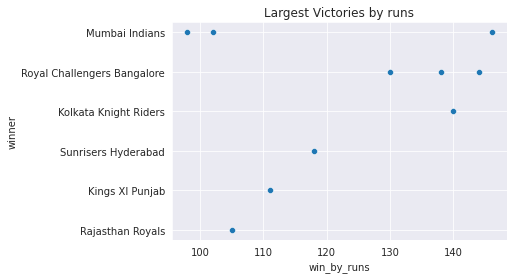

In [166]:
vic_runs=temp.head(10)
plt.title("Largest Victories by runs")
sns.scatterplot(x="win_by_runs",
                    y="winner",
                    data=vic_runs)

**Top 10 greatest victories by wickets**

In [168]:

temp=matches.sort_values('win_by_wickets',ascending=False)
temp['team1 v/s team2']=0
temp.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,team1 v/s team2
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,0
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,0
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,0
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,0
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,0
683,7941,2018,Indore,14/05/18,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,UT Yadav,Holkar Cricket Stadium,Bruce Oxenford,Virender Kumar Sharma,0
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,0
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,0
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,0
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,0


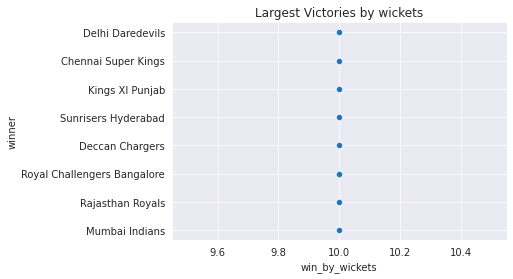

In [169]:
vic_wickets=temp.head(10)
plt.title("Largest Victories by wickets")
sns.scatterplot(x="win_by_wickets",
                    y="winner",
                    data=vic_wickets)

###**Team1 V/S Team2**

In [ ]:

def team1vsteam2(team1,team2):
  temp=matches[(matches['team1']==team1)&(matches['team2']==team2)|(matches['team1']==team2)&(matches['team2']==team1)]
  temp=temp[['season','team1','team2','winner']].reset_index().drop(columns='index')
  plt.figure(figsize=(20,10))
  sns.countplot(x='season', data=temp,hue='winner')
  plt.show()

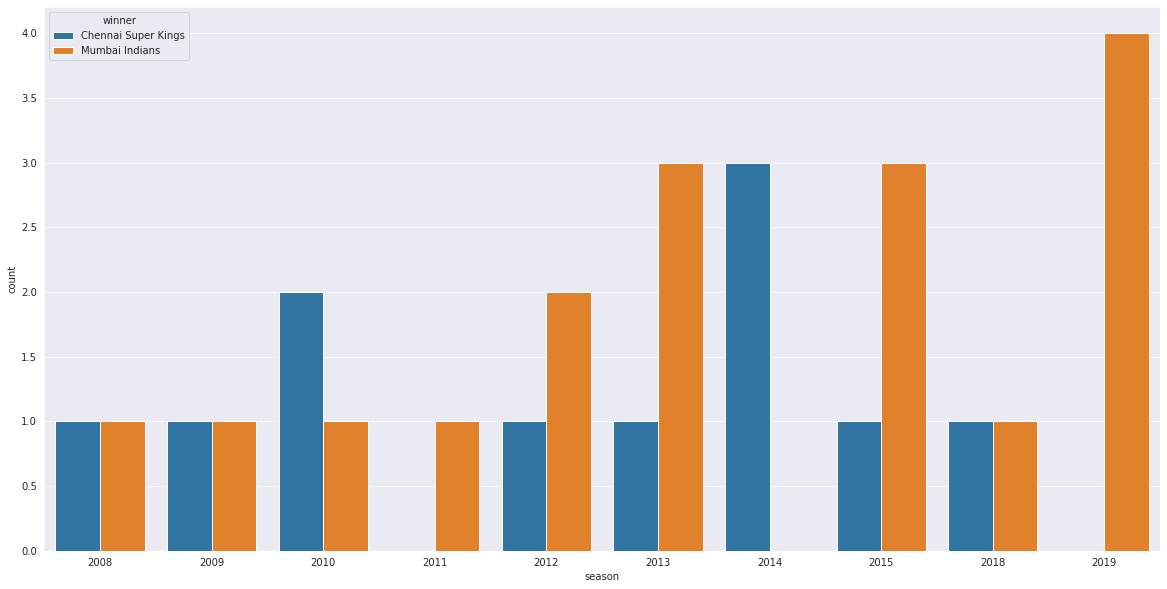

In [ ]:
team1vsteam2('Mumbai Indians','Chennai Super Kings')

###**Most Number of wins in every season**

In [ ]:
df=pd.DataFrame(columns=['year','Team','No of Wins'])

for x in range(2008,2020):
  temp=matches[matches['season']==x]
 
  temp2=temp['winner'].value_counts()[:1].rename_axis('Team').reset_index(name='No of Wins')
  temp2['year']=x
  df=df.append({'year':x,'Team':temp2['Team'][0],'No of Wins':temp2['No of Wins'][0]},ignore_index=True)
df

,year,Team,No of Wins
0,2008,Rajasthan Royals,13
1,2009,Delhi Daredevils,10
2,2010,Mumbai Indians,11
3,2011,Chennai Super Kings,11
4,2012,Kolkata Knight Riders,12
5,2013,Mumbai Indians,13
6,2014,Kings XI Punjab,12
7,2015,Chennai Super Kings,10
8,2016,Sunrisers Hyderabad,11
9,2017,Mumbai Indians,12


###**Most 50s and 100s**

In [ ]:
deliveries = pd.read_csv("/content/drive/MyDrive/WiDS_Dataset/IPL_Ball_by_Ball_2008_2022.csv")

In [ ]:
deliveries.head(5)

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:

ball=deliveries
ball.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [ ]:
ball.drop(columns=['bowler','non-striker','extra_type','extras_run','total_run','non_boundary','isWicketDelivery','player_out','kind','fielders_involved'])

,ID,innings,overs,ballnumber,batter,batsman_run,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,0,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,0,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,1,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,0,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,0,Rajasthan Royals
...,...,...,...,...,...,...,...
225949,335982,2,14,5,P Kumar,0,Royal Challengers Bangalore
225950,335982,2,14,6,SB Joshi,1,Royal Challengers Bangalore
225951,335982,2,14,7,P Kumar,0,Royal Challengers Bangalore
225952,335982,2,15,1,SB Joshi,0,Royal Challengers Bangalore


In [ ]:
lst=[]
columns=['batsman','fifties','hundreds']
batsmen=ball['batter'].unique()
for batsman in batsmen:
  temp=ball[ball['batter']==batsman]
  temp=temp.groupby(by=['ID']).sum()['batsman_run'].reset_index()
  fifty=0
  hundred=0
  for runs in temp['batsman_run']:
    if((runs>=50)and (runs<100)):
      fifty=fifty+1
    elif(runs>=100):
      hundred=hundred+1
    else:
      pass
  lst.append([batsman,fifty,hundred])
final=pd.DataFrame(lst,columns=columns)

In [ ]:

final=final.sort_values('fifties',ascending=False).reset_index().drop(columns='index')
final

,batsman,fifties,hundreds
0,DA Warner,55,4
1,S Dhawan,47,2
2,V Kohli,45,5
3,AB de Villiers,41,3
4,RG Sharma,40,1
...,...,...,...
600,DJM Short,0,0
601,Anureet Singh,0,0
602,AD Hales,0,0
603,N Jagadeesan,0,0


In [ ]:
final1=final.iloc[:10]
final1

,batsman,fifties,hundreds
0,DA Warner,55,4
1,S Dhawan,47,2
2,V Kohli,45,5
3,AB de Villiers,41,3
4,RG Sharma,40,1
5,SK Raina,39,1
6,G Gambhir,36,0
7,CH Gayle,32,6
8,KL Rahul,31,4
9,AM Rahane,28,2


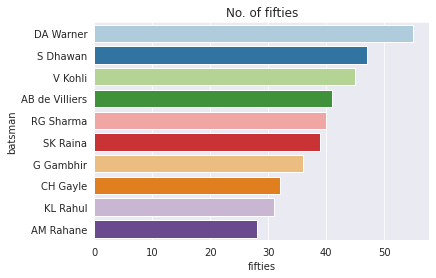

In [ ]:
plt.title("No. of fifties")
sns.barplot(x='fifties', y='batsman', data=final1, palette='Paired')

In [ ]:
final=final.sort_values('hundreds',ascending=False).reset_index().drop(columns='index')
final2=final[:15]
final2

,batsman,fifties,hundreds
0,CH Gayle,32,6
1,V Kohli,45,5
2,JC Buttler,15,5
3,DA Warner,55,4
4,SR Watson,21,4
5,KL Rahul,31,4
6,AB de Villiers,41,3
7,SV Samson,17,3
8,M Vijay,13,2
9,S Dhawan,47,2


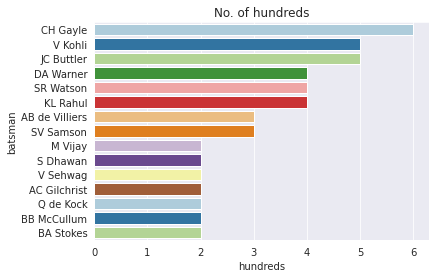

In [ ]:
plt.title("No. of hundreds")
sns.barplot(x='hundreds', y='batsman', data=final2, palette='Paired')